<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 4
#### Tomas A. Albanesi


## Indice de contenidos:
* [Consigna](#consigna)
* [Punto 1](#punto1)
    * [1.a. Resolucion analitica](#punto1a)
* [Punto 2](#punto2)
    * [2.a. Resolucion analitica](#punto2a)
    * [2.b. Simulacion numerica pasa bajos prototipo](#punto2b)
    * [2.c. Simulacion numerica pasa altos](#punto2c)
* [Punto 3](#punto3)
    * [3.a. Resolucion analitica](#punto3a)
    * [3.b. Simulacion circuital](#punto3b)
* [Punto 4](#punto4)
    * [4.a. Resolucion analitica](#punto4a)
    * [4.b. Simulacion circuital](#punto4b)
* [Conclusiones generales](#conclusiones)

## 0. Consigna <a class="anchor" id="consigna"></a>

<img src="./img/TS4_Albanesi_ConsignaParte1.png" width="400" /> 
<img src="./img/TS4_Albanesi_ConsignaParte2.png" width="800" /> 

## 1. Obtener transferencia para maxima planicidad <a class="anchor" id="punto1"></a>

### 1. a. Resolucion analitica <a class="anchor" id="punto1a"></a>

In [9]:
# Incorporacion y visualizacion de PDF
from IPython.display import IFrame
IFrame("./doc/TS4_Albanesi_Punto1Analitico.pdf", width=1000, height=1000)

## 2. Diagrama de polos y ceros, respuesta en frecuencia <a class="anchor" id="punto2"></a>

### 2. a. Resolucion analitica  <a class="anchor" id="punto2a"></a>

In [10]:
# Incorporacion y visualizacion de PDF
from IPython.display import IFrame
IFrame("./doc/TS4_Albanesi_Punto2Analitico.pdf", width=1000, height=1000)

### 2. b. Simulacion numerica pasa bajos prototipo <a class="anchor" id="punto2b"></a>

##### Importacion de librerias

In [31]:
# Importacion de librerias a utilizar
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_SOS
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

##### Inicializacion de graficos

In [32]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

##### Diagrama de polos y ceros, transferencia y retardo de grupo de filtro pasa bajos prototipo normalizado sin butterworth

Función de transferencia resultante:
Numerador: [1.961884]
Denominador: [1.       2.504    3.134504 1.961884]


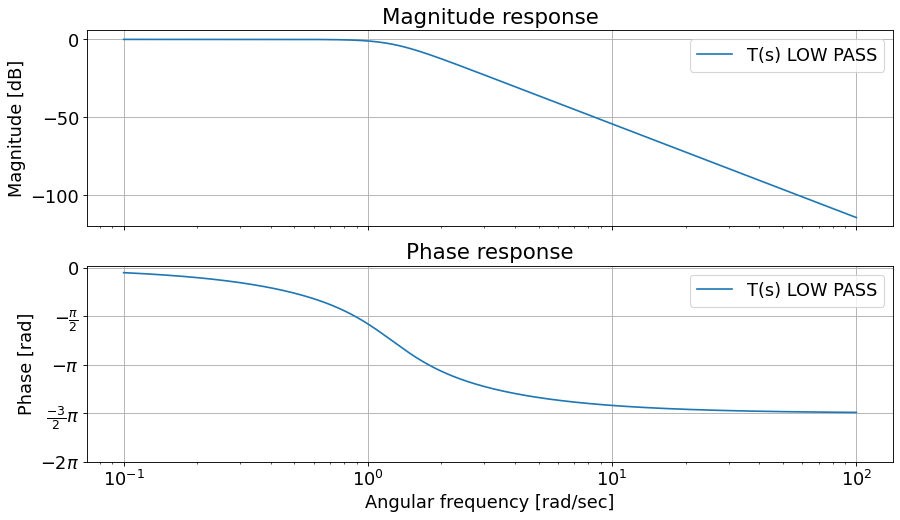

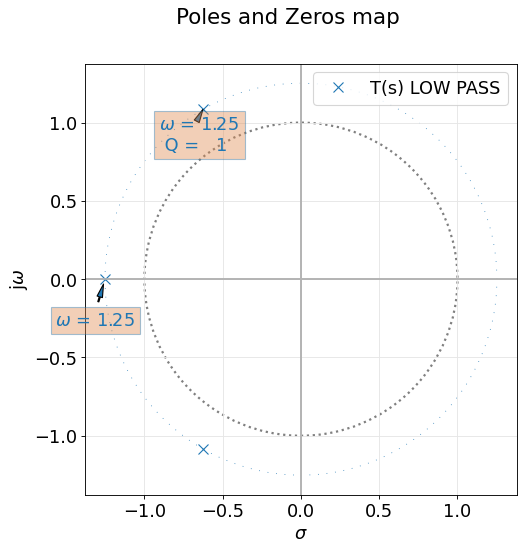

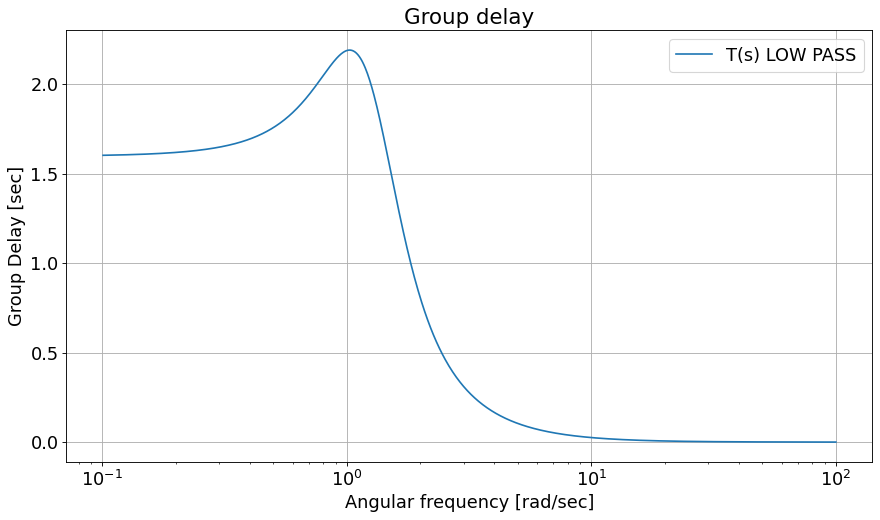

In [34]:
# Definicion de numeradores y denominadores
num_lp_n2 = [1.567]
den_lp_n2 = [1, 1.252, 1.567]
num_lp_n1 = [1.252]
den_lp_n1 = [1, 1.252]

# Definicion de las funciones transferencia parciales y totales
tf_lp_n2 = signal.TransferFunction(num_lp_n2, den_lp_n2)
tf_lp_n1 = signal.TransferFunction(num_lp_n1, den_lp_n1)
tf_lp_n3_num = np.convolve(num_lp_n2, num_lp_n1)
tf_lp_n3_den = np.convolve(den_lp_n2, den_lp_n1)
tf_lp_n3 = signal.TransferFunction(tf_lp_n3_num, tf_lp_n3_den)

# Muestro resultados de la funcion transferencia resultante
print("Función de transferencia resultante:")
print(f"Numerador: {tf_lp_n3.num}")
print(f"Denominador: {tf_lp_n3.den}")

# Analizo la funcion transferencia
analyze_sys(tf_lp_n3, "T(s) LOW PASS")

### 2. c. Simulacion numerica pasa altos <a class="anchor" id="punto2c"></a>

##### Diagrama de polos y ceros, transferencia y retardo de grupo de filtro pasa altos

Función de transferencia resultante:
Numerador: [1. 0. 0. 0.]
Denominador: [1.       1.596    1.274804 0.509124]


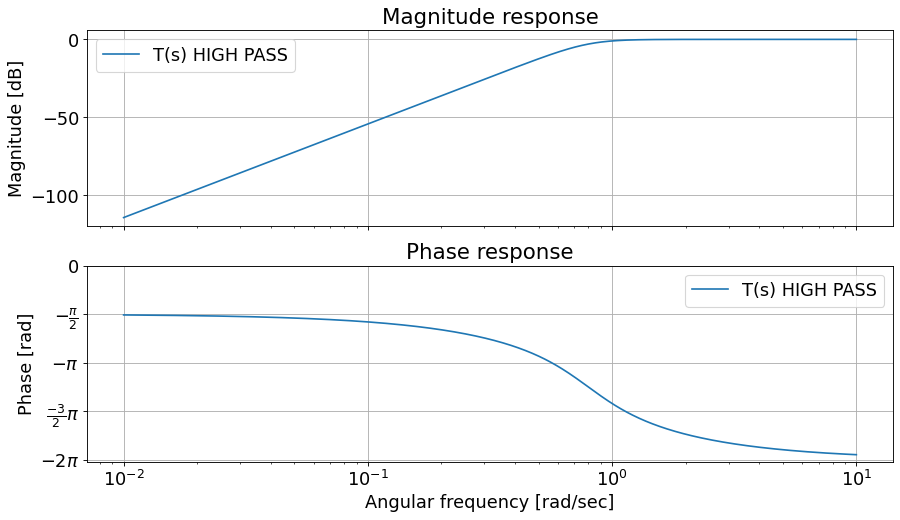

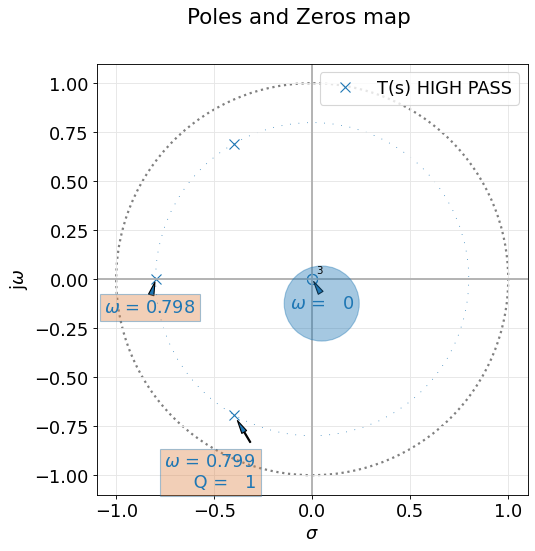

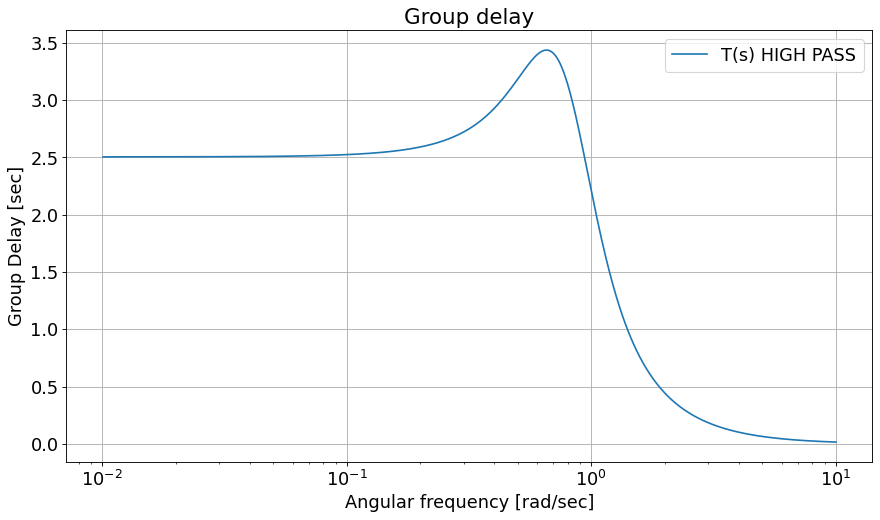

In [36]:
# Definicion de numeradores y denominadores
num_hp_n2 = [1, 0, 0]
den_hp_n2 = [1, 0.798, 0.638]
num_hp_n1 = [1, 0]
den_hp_n1 = [1, 0.798]

# Definicion de las funciones transferencia parciales y totales
tf_hp_n2 = signal.TransferFunction(num_hp_n2, den_hp_n2)
tf_hp_n1 = signal.TransferFunction(num_hp_n1, den_hp_n1)
tf_hp_n3_num = np.convolve(num_hp_n2, num_hp_n1)
tf_hp_n3_den = np.convolve(den_hp_n2, den_hp_n1)
tf_hp_n3 = signal.TransferFunction(tf_hp_n3_num, tf_hp_n3_den)

# Muestro resultados de la funcion transferencia resultante
print("Función de transferencia resultante:")
print(f"Numerador: {tf_hp_n3.num}")
print(f"Denominador: {tf_hp_n3.den}")

# Analizo la funcion transferencia
analyze_sys(tf_hp_n3, "T(s) HIGH PASS")

## 3. Implementar el circuito normalizado con estructuras pasivas separadas mediantes buffers <a class="anchor" id="punto3"></a>

### 3. a. Resolucion analitica  <a class="anchor" id="punto3a"></a>

In [11]:
# Incorporacion y visualizacion de PDF
from IPython.display import IFrame
IFrame("./doc/TS4_Albanesi_Punto3Analitico.pdf", width=1000, height=1000)

### 3. b. Simulacion circuital  <a class="anchor" id="punto3b"></a>

#### Circuito o red

<center> <img src="./img/TS4_Albanesi_Punto3Circuito.png" width="800" /> </center>

#### Simulacion

<center> <img src="./img/TS4_Albanesi_Punto3Simulacion.png" width="1000" /> </center>

## 4. Reemplazar inductores mediante GIC de Antoniou <a class="anchor" id="punto4"></a>

### 4. a. Resolucion analitica  <a class="anchor" id="bonus1a"></a>

In [12]:
# Incorporacion y visualizacion de PDF
from IPython.display import IFrame
IFrame("./doc/TS4_Albanesi_Punto4Analitico.pdf", width=1000, height=1000)

### 4. b. Simulacion circuital  <a class="anchor" id="punto4b"></a>

#### Circuito o red

<center> <img src="./img/TS4_Albanesi_Punto4Circuito.png" width="800" /> </center>

#### Simulacion

<center> <img src="./img/TS4_Albanesi_Punto4Simulacion.png" width="1000" /> </center>

## Conclusiones generales <a class="anchor" id="conclusiones"></a>

Como se puede observar, se pudo realizar el filtro pasa altos del plantilla solicitado mediante la conversion de dicha plantilla a un pasa bajos prototipo para realizar las diversas operaciones, y luego una vez obtenida la transferencia del pasa bajos prototipo, aplicar el nucleo de transformacion para llegar finalmente a la transferencia del pasa altos deseada.

Se pudo comprobar mediante la simulacion numerica en Python, y la simulacion circuital el correcto diseño del filtro, verificando los puntos de antenuacion maxima y minima, asi como el diseño de maxima planicidad requerido.

Ademas, se pudo notar que la unica diferencia, con respecto a los polos, del diagrama del pasa altos y pasa bajos, es que al realizar la conversion, los polos que en el filtro pasa bajos se encontraban en el exterior de la circunferencia unitaria, en el pasa altos quedan "espejados", respecto de la circunferencia unitario, y por lo tanto, se alojan en su interior.

Con respecto al GIC de Antoniou, teniendo en cuenta la impedancia de entrada, se realizo el reemplazo del inductor de la etapa de segundo orden, por esta configuracion, la cual, verifica el mismo comportamiento.